In [45]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("DATASET_BERES.csv", parse_dates=True)
df = pd.DataFrame(df)
df['intercontact'] = df['intercontact'].fillna(0)
#df["start"] = df["start"].astype("datetime64")
inter_toNum = df['intercontact'].to_numpy()

print(inter_toNum )
'''vect = df[['intercontact', 'spatiaLoc']].to_numpy()
df['vect'] = vect.tolist()
df = df[['start','vect']]
'''
#print(df)
#print(df2)
#print(df2[15])

#print(df.info())

[0.00000000e+00 5.55555556e-04 1.66222222e+00 ... 4.49583333e-01
 6.63462963e+00 5.48850000e+01]


"vect = df[['intercontact', 'spatiaLoc']].to_numpy()\ndf['vect'] = vect.tolist()\ndf = df[['start','vect']]\n"

print(inter_toNum )

                     intercontact
start                            
2004-07-19 12:00:00      0.000000
2004-07-19 12:00:00      0.000556
2004-07-20 06:00:00      1.662222
2004-07-20 06:00:00     11.430139
2004-07-20 06:00:00      0.230455
...                           ...
2005-06-20 06:00:00    206.688056
2005-06-20 12:00:00     15.592222
2005-06-20 18:00:00      0.449583
2005-06-21 12:00:00      6.634630
2005-06-22 12:00:00     54.885000

[137985 rows x 1 columns]


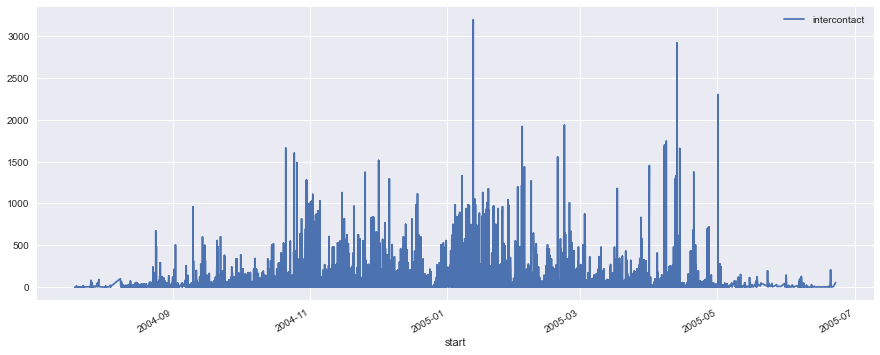

In [46]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv("DATASET_BERES1.csv", index_col='start', parse_dates=True)
drop_col = ['spatiaLoc','id_colums']
df.drop(drop_col, axis=1, inplace=True)
print(df)
df.plot(figsize=(15, 6))
plt.show()


In [71]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("DATASET_BERES1.csv", usecols=['intercontact'], parse_dates=True)
df = pd.DataFrame(df)
#x = df['intercontact']
# create a scaler object

print(df)
df1.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')  

        intercontact
0           0.000000
1           0.000556
2           1.662222
3          11.430139
4           0.230455
...              ...
137980    206.688056
137981     15.592222
137982      0.449583
137983      6.634630
137984     54.885000

[137985 rows x 1 columns]
